In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split


In [29]:
df = pd.read_excel("housing_data.xlsx",)

df.head()



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [43]:
X = df[["LSTAT"]].values
y = df["MEDV"].values


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)



In [45]:
from sklearn.linear_model import LinearRegression

slr = LinearRegression()
slr.fit(X_train, y_train)


print("Slope: %.3f" % slr.coef_[0])
print("Intercept: %.3f" % slr.intercept_)



Slope: -0.968
Intercept: 34.790


In [118]:
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)


In [119]:
def reg_plot(ax, X, y, y_pred, title, color="steelblue"):
    ax.scatter(X, y, c=color, edgecolor="white", s=70)
    ax.plot(X, y_pred, color="black", lw=2)
    ax.set_title(title)
    return



Text(0.02, 0.5, 'Average number of rooms [RM]')

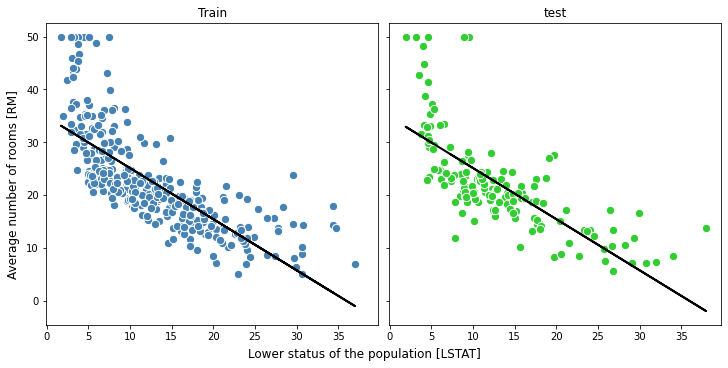

In [120]:
fig, ax = plt.subplots(
    1, 2, figsize=(10, 5), constrained_layout=True, sharex=True, sharey=True
)
reg_plot(ax=ax[0], X=X_train, y=y_train, y_pred=y_train_pred, title="Train")
reg_plot(
    ax=ax[1], X=X_test, y=y_test, y_pred=y_test_pred, title="test", color="limegreen"
)
fig.supxlabel("Lower status of the population [LSTAT]")
fig.supylabel("Average number of rooms [RM]")



In [138]:
def res_plot(ax, y_pred, y, title, color="steelblue"):
    ax.scatter(y_pred, y_pred - y, c=color, marker="o", edgecolor="white", s=70)
    ax.hlines(y=0, xmin=-10, xmax=50, color="black", lw=2)
    ax.axes.set_aspect("equal")
    ax.set_title(title)


Text(0.02, 0.5, 'Residual')

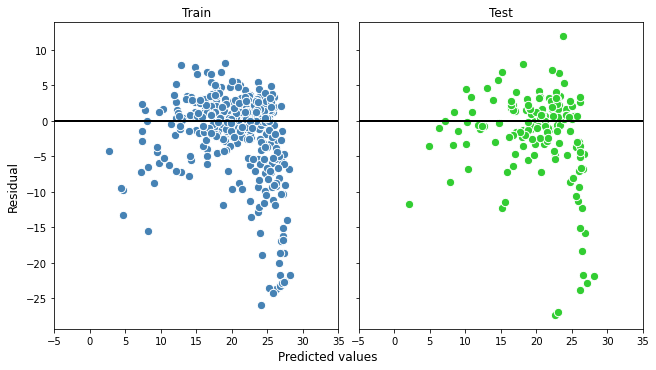

In [139]:
fig, ax = plt.subplots(
    1, 2, figsize=(9, 5), constrained_layout=True, sharex=True, sharey=True
)
res_plot(ax=ax[0], y_pred=y_train_pred, y=y_train, title="Train")
res_plot(ax=ax[1], y_pred=y_test_pred, y=y_test, title="Test", color="limegreen")
ax[0].set_xlim([-5, 35])
fig.supxlabel("Predicted values")
fig.supylabel("Residual")


In [122]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print(
    "MSE train: %.3f, test: %.3f"
    % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred),
    )
)
print(
    "R^2 train: %.3f, test: %.3f"
    % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred))
)



MSE train: 37.934, test: 39.817
R^2 train: 0.552, test: 0.522


In [128]:
from sklearn.linear_model import RANSACRegressor

rc = RANSACRegressor(
    LinearRegression(),
    max_trials=100,
    min_samples=50,
    loss="absolute_loss",
    residual_threshold=5.0,
    random_state=0,
)


In [133]:
rc.fit(X_train, y_train)

inlier_mask = rc.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)


In [134]:
y_train_pred = rc.predict(X_train)
y_test_pred = rc.predict(X_test)


Text(0.02, 0.5, 'Average number of rooms [RM]')

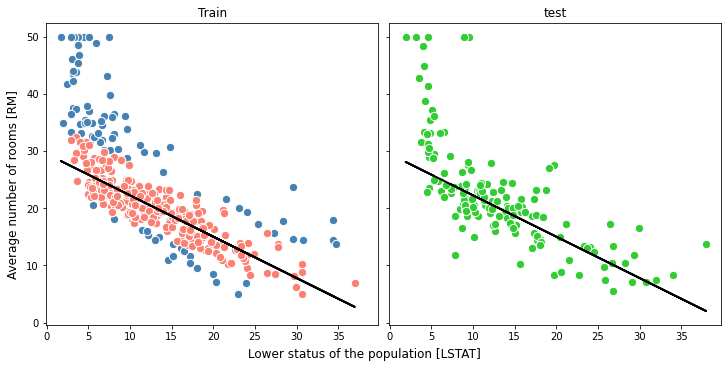

In [140]:
fig, ax = plt.subplots(
    1, 2, figsize=(10, 5), constrained_layout=True, sharex=True, sharey=True
)
reg_plot(ax=ax[0], X=X_train, y=y_train, y_pred=y_train_pred, title="Train")
ax[0].scatter(
    X_train[inlier_mask],
    y_train[inlier_mask],
    c="salmon",
    edgecolor="white",
    marker="o",
    label="Inliers",
    s=70,
)
reg_plot(
    ax=ax[1], X=X_test, y=y_test, y_pred=y_test_pred, title="test", color="limegreen"
)
fig.supxlabel("Lower status of the population [LSTAT]")
fig.supylabel("Average number of rooms [RM]")


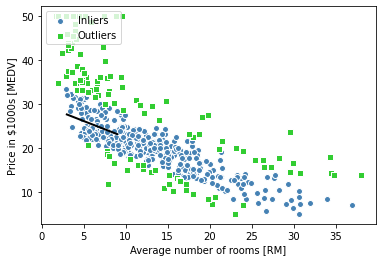

In [24]:
plt.scatter(
    X[inlier_mask],
    y[inlier_mask],
    c="steelblue",
    edgecolor="white",
    marker="o",
    label="Inliers",
)
plt.scatter(
    X[outlier_mask],
    y[outlier_mask],
    c="limegreen",
    edgecolor="white",
    marker="s",
    label="Outliers",
)
plt.plot(line_X, line_y_ransac, color="black", lw=2)
plt.xlabel("Average number of rooms [RM]")
plt.ylabel("Price in $1000s [MEDV]")
plt.legend(loc="upper left")

# plt.savefig('images/10_08.png', dpi=300)
plt.show()


In [15]:
X = df.iloc[:, :-1].values
y = df["MEDV"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)



In [16]:
slr = LinearRegression()

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)


In [59]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print(
    "MSE train: %.3f, test: %.3f"
    % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred),
    )
)
print(
    "R^2 train: %.3f, test: %.3f"
    % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred))
)



MSE train: 19.958, test: 27.196
R^2 train: 0.765, test: 0.673


In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)
print(lasso.coef_)
